In [3]:
#Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # ['r', 'python'] -> [r, python]

In [4]:
# Only data analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [5]:
# Listed the job counts based on country name
df_DA_country = df_DA['job_country'].value_counts().to_frame().head(20)
df_DA_country = df_DA_country[1:20]
list_of_countries = df_DA_country.index.to_list()

# Because of the currency deficit, need to remove some of the countries 
list_to_remove = ['Singapore', 'India', 'Philippines','Mexico', 'United Arab Emirates', 'Malaysia', 'South Africa', 'Canada']
for i in range(len(list_to_remove)):
    list_of_countries.remove(list_to_remove[i])

df_DA_country = df_DA[df_DA['job_country'].isin(list_of_countries)]
#df_DA_country.value_counts('job_title_short') there are 61324 job postings
# list_of_countries countries that we work on: ['France','United Kingdom','Germany' 'Spain','Italy','Netherlands','Portugal','Belgium','Poland 'Ireland','Switzerland']

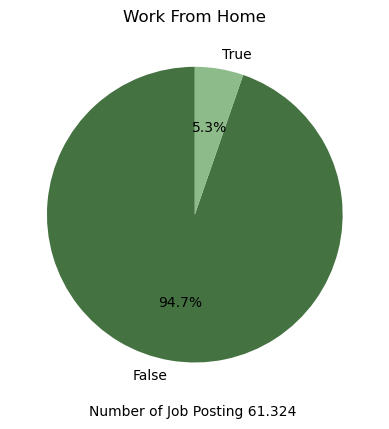

In [15]:
df_DA_country['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%', colors=['#447241', '#8dbc8a'])
plt.title('Work From Home')
plt.ylabel('')
plt.xlabel('Number of Job Posting 61.324 ')
plt.show()

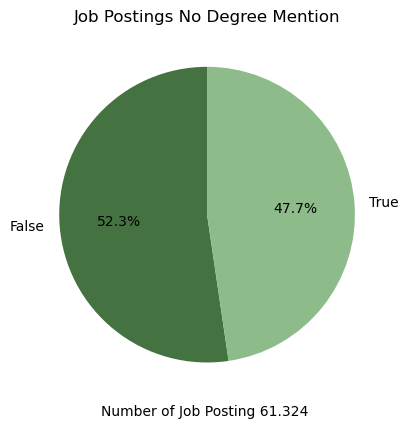

In [14]:
df_DA_country['job_no_degree_mention'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%', colors=['#447241', '#8dbc8a'])
plt.title('Job Postings No Degree Mention')
plt.ylabel('')
plt.xlabel('Number of Job Posting 61.324 ')
plt.show()

# %47 of the job postings are not required degree

61324